In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Function grabbed by Vitor
def extract_properties_from_log(log_file_path):
    data = []
    search_token = 'TotEng'
    df_head = None
    with open(log_file_path, 'r') as f:
        for line in f:
            if search_token in line:
                df_head = line.split()
            try:
                properties = list(map(float, line.split()))
                data.append(properties)
            except:
                continue

    # There is some [] at the end of the data for some reason so I'm removing it
    while [] in data:
        del data[data.index([])]

    # Dropna because if we got some other numeric row we need to eliminate it.
    df = pd.DataFrame(data, columns=df_head).dropna(axis=0)
    return df

In [38]:
# Usage example
common_path = 'graphene_single_layer_LJ_40C_log.txt' # path of the lammps log file
LJ_data = extract_properties_from_log(common_path)

In [21]:
LJ_data

,Step,Temp,Press,Volume,Lx,Density,PotEng,TotEng
0,0.0,0.000000,1.940210e+08,676.0,13.0,1.180132,476815.89000,476815.89000
1,96.0,0.000000,2.652900e+06,676.0,13.0,1.180132,6295.56490,6295.56490
3,96.0,0.000000,2.652900e+06,676.0,13.0,1.180132,6295.56490,6295.56490
4,100.0,0.064952,2.652897e+06,676.0,13.0,1.180132,6295.55720,6295.56470
5,200.0,1616.209700,4.259653e+05,676.0,13.0,1.180132,894.65764,1082.54460
...,...,...,...,...,...,...,...,...
500,49700.0,49.131062,1.530524e+05,676.0,13.0,1.180132,277.22491,282.93648
501,49800.0,52.187452,1.533562e+05,676.0,13.0,1.180132,277.88504,283.95192
502,49900.0,57.052457,1.535609e+05,676.0,13.0,1.180132,278.27652,284.90896
503,50000.0,62.745993,1.532293e+05,676.0,13.0,1.180132,277.38325,284.67758


(20, 80)

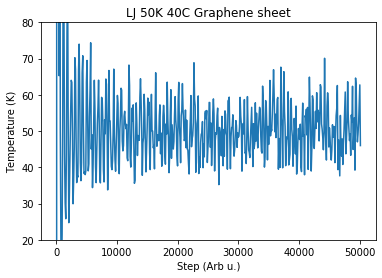

In [6]:
plt.plot( LJ_data['Step'] , LJ_data['Temp'] , label='Temperature')
plt.ylabel('Temperature (K)')
plt.xlabel('Step (Arb u.)')
plt.title('LJ 50K 40C Graphene sheet')
plt.ylim(20,80)

(200, 400)

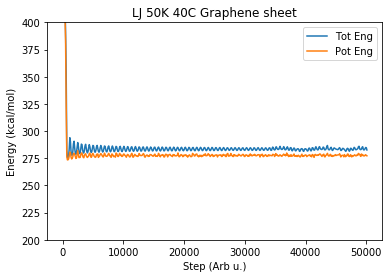

In [8]:
plt.plot( LJ_data['Step'] , LJ_data['TotEng'] , label='Tot Eng')
plt.plot( LJ_data['Step'] , LJ_data['PotEng'] , label='Pot Eng')
plt.ylabel('Energy (kcal/mol)')
plt.xlabel('Step (Arb u.)')
plt.title('LJ 50K 40C Graphene sheet')
plt.legend()
plt.ylim(200, 400)

In [26]:
var_e = np.var(LJ_data['TotEng'][102:]) # Variance of total energy kcal/mol

In [29]:
var_e

1.3022677983813629

In [16]:
# Var(E)/k_b*(T^2)
k_b = 3.29983031e-27 # kcal/K
T = 50 # K
N_A = 6.022e23 # mol
C_v = var_e/(N_A*k_b*T*T) # kcal^2*K
                      # -----------
                      # kcal*mol^2*K^2 

# kcal to Joules
kcal_to_J = 4184 

In [31]:
C_v*kcal_to_J # J/(mol*K)

1096.7802222157102

In [32]:
# mol to g
mol_to_gram = 12.01 # molar mass of carbon
C_v*kcal_to_J/mol_to_gram

91.3222499763289

In [10]:
# Usage example
common_path = 'graphene_single_layer_ReaxFF_40_C_log.txt' # path of the lammps log file
ReaxFF_data = extract_properties_from_log(common_path)

In [11]:
ReaxFF_data

,Step,Temp,Press,Volume,Lx,Density,PotEng,TotEng
0,0.0,0.000000,285703.9000,676.0,13.0,1.180132,-6221.1328,-6221.1328
1,99.0,0.000000,37012.8790,676.0,13.0,1.180132,-6789.2155,-6789.2155
3,99.0,0.000000,37012.8790,676.0,13.0,1.180132,-6789.2155,-6789.2155
4,100.0,5.150654,35835.0300,676.0,13.0,1.180132,-6789.9204,-6789.3216
5,200.0,644.252090,72507.2780,676.0,13.0,1.180132,-6725.2359,-6650.3405
...,...,...,...,...,...,...,...,...
500,49700.0,73.357444,-14289.0080,676.0,13.0,1.180132,-6912.1846,-6903.6567
501,49800.0,83.115396,-3272.0365,676.0,13.0,1.180132,-6907.4333,-6897.7710
502,49900.0,43.504268,-49039.5000,676.0,13.0,1.180132,-6884.5380,-6879.4805
503,50000.0,129.607200,-51906.7440,676.0,13.0,1.180132,-6866.3494,-6851.2824


Text(0.5, 1.0, 'ReaxtFF 50K 40C Graphene sheet')

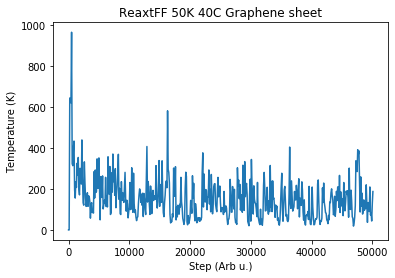

In [12]:
plt.plot( ReaxFF_data['Step'] , ReaxFF_data['Temp'] , label='Temperature')
plt.ylabel('Temperature (K)')
plt.xlabel('Step (Arb u.)')
plt.title('ReaxtFF 50K 40C Graphene sheet')

(-6950, -6700)

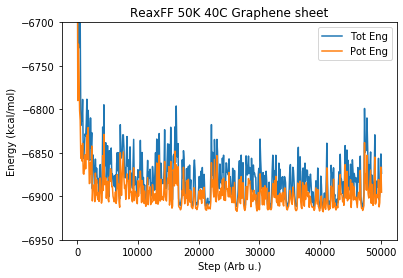

In [15]:
plt.plot( ReaxFF_data['Step'] , ReaxFF_data['TotEng'] , label='Tot Eng')
plt.plot( ReaxFF_data['Step'] , ReaxFF_data['PotEng'] , label='Pot Eng')
plt.ylabel('Energy (kcal/mol)')
plt.xlabel('Step (Arb u.)')
plt.legend()
plt.title('ReaxFF 50K 40C Graphene sheet')
plt.ylim(-6950, -6700)

In [55]:
T = np.mean(ReaxFF_data['Temp'][102:]) # Temperature mean
T

138.29593937562177

In [56]:
var_e = np.var(ReaxFF_data['PotEng'][102:]) # Variance of total energy kcal/mol
var_e

199.17033936662034

In [57]:
# Var(E)/k_b*(T^2)
var_e = np.var(ReaxFF_data['PotEng'][102:]) # Variance of total energy kcal/mol
k_b = 3.29983031e-27 # kcal/K
N_A = 6.022e23 # mol
T = np.mean(ReaxFF_data['Temp'][102:]) # Temperature mean
C_v = var_e/(N_A*k_b*T*T) # kcal^2*K
                      # -----------
                      # kcal*mol^2*K^2 

# kcal to Joules
kcal_to_J = 4184 

In [58]:
C_v*kcal_to_J # J/(mol*K)

21926.288466572114

In [59]:
# mol to g
mol_to_gram = 12.01 # molar mass of carbon
C_v*kcal_to_J/mol_to_gram

1825.6693144522992

Function for processing data

In [145]:
def get_data(file, warmup=1501):

    common_path = file # path of the lammps log file
    LJ_data = extract_properties_from_log(common_path)

    var_u = np.var(LJ_data['PotEng'][warmup:]) # Variance of potential energy kcal/mol
    var_e = np.var(LJ_data['TotEng'][warmup:]) # Variance of total energy kcal/mol

    k_b = 3.29983031e-27 # kcal/K
    T = np.mean(LJ_data['Temp'][warmup:]) # K
    N_A = 6.022e23 # mol

    C_v_u = var_u/(N_A*k_b*T*T) # kcal^2*K
                                # -----------
                                # kcal*mol^2*K^2 
    C_v_e = var_e/(N_A*k_b*T*T) # kcal^2*K
                                # -----------
                                # kcal*mol^2*K^2 
    
    E = np.mean(LJ_data['TotEng'][warmup:])
    U = np.mean(LJ_data['PotEng'][warmup:])
    T = np.mean(LJ_data['Temp'][warmup:])

    return var_u, var_e, C_v_u, C_v_e, E, U, T

795 Atoms

In [124]:
# Usage example
common_path = 'graphene_single_layer_LJ_795C_after_log.txt' # path of the lammps log file
LJ_data = extract_properties_from_log(common_path)

(20, 80)

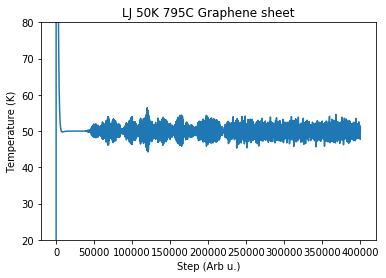

In [125]:
plt.plot( LJ_data['Step'] , LJ_data['Temp'] , label='Temperature')
plt.ylabel('Temperature (K)')
plt.xlabel('Step (Arb u.)')
plt.title('LJ 50K 795C Graphene sheet')
plt.ylim(20,80)

(-100, 200)

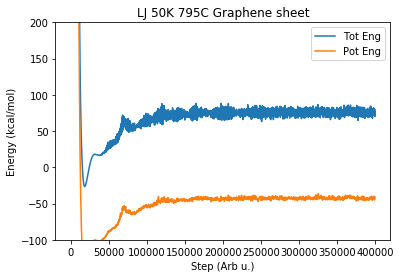

In [126]:
plt.plot( LJ_data['Step'] , LJ_data['TotEng'] , label='Tot Eng')
plt.plot( LJ_data['Step'] , LJ_data['PotEng'] , label='Pot Eng')
plt.ylabel('Energy (kcal/mol)')
plt.xlabel('Step (Arb u.)')
plt.title('LJ 50K 795C Graphene sheet')
plt.legend()
plt.ylim(-100, 200)

In [127]:
np.where(LJ_data['Step'] == 150000)

(array([1501]),)

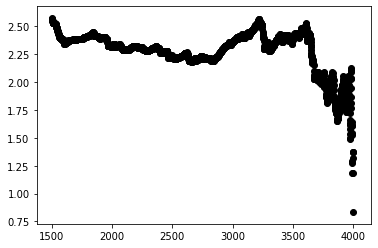

In [31]:
for i in range(1501,4000):
    plt.scatter(i, np.var(LJ_data['PotEng'][i:]), c='k') # How much does the variance vary

In [89]:
var_e_50K = np.var(LJ_data['PotEng'][1501:]) # Variance of potential energy kcal/mol

In [94]:
# Var(E)/k_b*(T^2)
k_b = 3.29983031e-27 # kcal/K
T = 50 # K
N_A = 6.022e23 # mol
C_v_50K = var_e/(N_A*k_b*T*T) # kcal^2*K
                      # -----------
                      # kcal*mol^2*K^2 

# kcal to Joules
kcal_to_J = 4184 

In [95]:
C_v_50K*kcal_to_J # J/(mol*K)

2168.8910677945646

In [47]:
# mol to g
mol_to_gram = 12.01 # molar mass of carbon
C_v*kcal_to_J/mol_to_gram

236.46486031938582

In [48]:
# Var(E)/k_b*(T^2)
k_b = 0.0019872041 # kcal/(mol*K)
T = 50 # K
#N_A = 6.022e23 # mol
C_v = var_e/(k_b*T*T)     # kcal*kcal*mol*K     kcal
                          # -----------      == -------
                          # mol*mol*kcal*K*K    mol*K

# kcal to Joules
kcal_to_J = 4184 

In [49]:
C_v*kcal_to_J

2839.8768225403674

In [96]:
U_50K = np.mean(LJ_data['PotEng'][1501:])
T_50K = np.mean(LJ_data['Temp'][1501:])

795 atoms 60K

In [97]:
# Usage example
common_path = 'graphene_single_layer_LJ_795C_after_temp_60K_log.txt' # path of the lammps log file
LJ_data = extract_properties_from_log(common_path)

(20, 80)

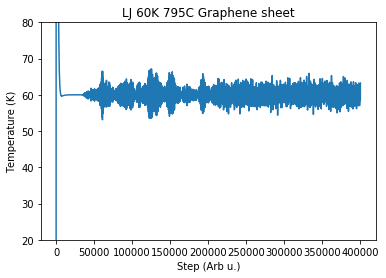

In [98]:
plt.plot( LJ_data['Step'] , LJ_data['Temp'] , label='Temperature')
plt.ylabel('Temperature (K)')
plt.xlabel('Step (Arb u.)')
plt.title('LJ 60K 795C Graphene sheet')
plt.ylim(20,80)

(-100, 200)

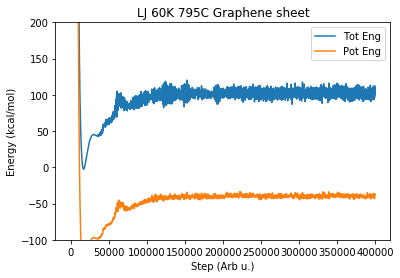

In [99]:
plt.plot( LJ_data['Step'] , LJ_data['TotEng'] , label='Tot Eng')
plt.plot( LJ_data['Step'] , LJ_data['PotEng'] , label='Pot Eng')
plt.ylabel('Energy (kcal/mol)')
plt.xlabel('Step (Arb u.)')
plt.title('LJ 60K 795C Graphene sheet')
plt.legend()
plt.ylim(-100, 200)

In [100]:
np.where(LJ_data['Step'] == 150000)

(array([1501]),)

In [101]:
var_e = np.var(LJ_data['PotEng'][1501:]) # Variance of total energy kcal/mol

In [102]:
var_e

3.3720213104966477

In [103]:
# Var(E)/k_b*(T^2)
k_b = 3.29983031e-27 # kcal/K
T = 50 # K
N_A = 6.022e23 # mol
C_v_60K = var_e/(N_A*k_b*T*T) # kcal^2*K
                      # -----------
                      # kcal*mol^2*K^2 

# kcal to Joules
kcal_to_J = 4184 

In [104]:
C_v_60K*kcal_to_J # J/(mol*K)

2839.942972435824

In [105]:
U_60K = np.mean(LJ_data['PotEng'][1501:])
T_60K = np.mean(LJ_data['Temp'][1501:])

795 atoms 70K

In [106]:
# Usage example
common_path = 'graphene_single_layer_LJ_795C_after_temp_70K_log.txt' # path of the lammps log file
LJ_data = extract_properties_from_log(common_path)

(20, 80)

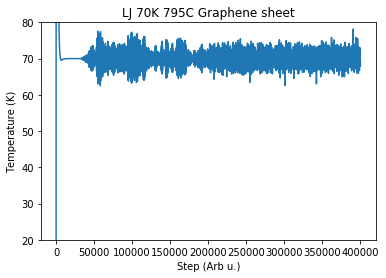

In [107]:
# Usage example
common_path = 'graphene_single_layer_LJ_795C_after_temp_70K_log.txt' # path of the lammps log file
LJ_data = extract_properties_from_log(common_path)
plt.plot( LJ_data['Step'] , LJ_data['Temp'] , label='Temperature')
plt.ylabel('Temperature (K)')
plt.xlabel('Step (Arb u.)')
plt.title('LJ 70K 795C Graphene sheet')
plt.ylim(20,80)

(-100, 200)

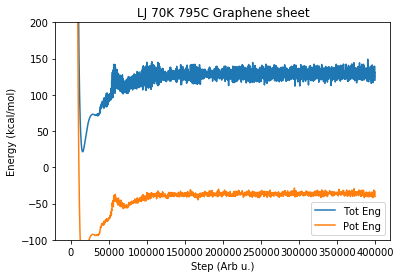

In [108]:
plt.plot( LJ_data['Step'] , LJ_data['TotEng'] , label='Tot Eng')
plt.plot( LJ_data['Step'] , LJ_data['PotEng'] , label='Pot Eng')
plt.ylabel('Energy (kcal/mol)')
plt.xlabel('Step (Arb u.)')
plt.title('LJ 70K 795C Graphene sheet')
plt.legend()
plt.ylim(-100, 200)

In [109]:
np.where(LJ_data['Step'] == 150000)

(array([1501]),)

In [111]:
var_e = np.var(LJ_data['PotEng'][1501:]) # Variance of total energy kcal/mol

In [112]:
var_e

4.333019920233741

In [114]:
# Var(E)/k_b*(T^2)
k_b = 3.29983031e-27 # kcal/K
T = 50 # K
N_A = 6.022e23 # mol
C_v_70K = var_e/(N_A*k_b*T*T) # kcal^2*K
                      # -----------
                      # kcal*mol^2*K^2 

# kcal to Joules
kcal_to_J = 4184 

In [115]:
C_v_70K*kcal_to_J # J/(mol*K)

3649.303589389187

In [116]:
U_70K = np.mean(LJ_data['PotEng'][1501:])
T_70K = np.mean(LJ_data['Temp'][1501:])

Analyze Data together

69.99917868225441

In [120]:
C_v_2 = (U_60K-U_50K)/(T_60K-T_50K)

In [121]:
C_v_2*kcal_to_J

1297.343175456594

In [122]:
C_v_2 = (U_70K-U_50K)/(T_70K-T_50K)

In [123]:
C_v_2*kcal_to_J

1293.8832408090727

Plots

In [155]:
# graphene_single_layer_LJ_795C_after_temp_70K_log.txt
# graphene_single_layer_LJ_795C_after_temp_60K_log.txt
# graphene_single_layer_LJ_795C_after_log.txt

var_u_50K, var_e_50K, C_v_u_50K, C_v_e_50K, E_50K, U_50K, T_50K = get_data('graphene_single_layer_LJ_795C_after_log.txt')

In [156]:
var_u_60K, var_e_60K, C_v_u_60K, C_v_e_60K, E_60K, U_60K, T_60K = get_data('graphene_single_layer_LJ_795C_after_temp_60K_log.txt')

In [157]:
var_u_70K, var_e_70K, C_v_u_70K, C_v_e_70K, E_70K, U_70K, T_70K = get_data('graphene_single_layer_LJ_795C_after_temp_70K_log.txt')

In [159]:
temps = [50,60,70]

Text(0.5, 0, 'Temperature (K)')

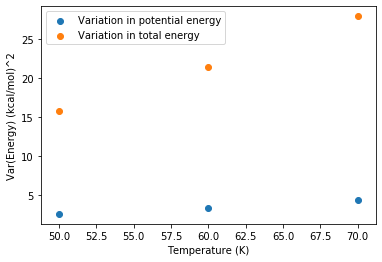

In [160]:
plt.scatter( temps, [var_u_50K, var_u_60K, var_u_70K] , label="Variation in potential energy")
plt.scatter( temps, [var_e_50K, var_e_60K, var_e_70K] , label="Variation in total energy")
plt.legend()
plt.ylabel("Var(Energy) (kcal/mol)^2")
plt.xlabel("Temperature (K)")

Text(0.5, 0, 'Temperature (K)')

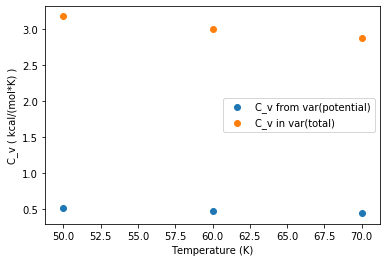

In [161]:
plt.scatter( temps, [C_v_u_50K, C_v_u_60K, C_v_u_70K] , label="C_v from var(potential)")
plt.scatter( temps, [C_v_e_50K, C_v_e_60K, C_v_e_70K] , label="C_v in var(total)")
plt.legend()
plt.ylabel("C_v ( kcal/(mol*K) )")
plt.xlabel("Temperature (K)")

Text(0.5, 0, 'Temperature (K)')

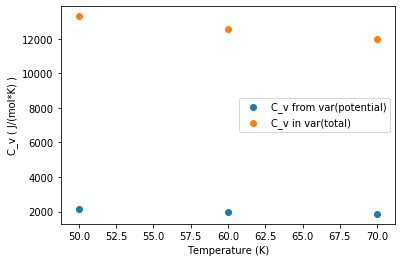

In [162]:
plt.scatter( temps, np.array([C_v_u_50K, C_v_u_60K, C_v_u_70K])*kcal_to_J , label="C_v from var(potential)")
plt.scatter( temps, np.array([C_v_e_50K, C_v_e_60K, C_v_e_70K])*kcal_to_J , label="C_v in var(total)")
plt.legend()
plt.ylabel("C_v ( J/(mol*K) )")
plt.xlabel("Temperature (K)")

Text(0.5, 0, 'Temperature (K)')

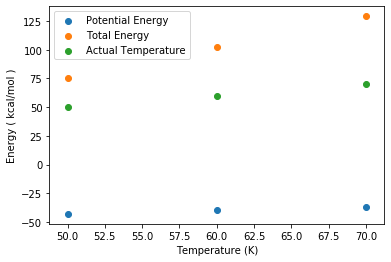

In [163]:
plt.scatter( temps, np.array([U_50K, U_60K, U_70K]) , label="Potential Energy")
plt.scatter( temps, np.array([E_50K, E_60K, E_70K]) , label="Total Energy")
plt.scatter( temps, np.array([T_50K, T_60K, T_70K]) , label="Actual Temperature")
plt.legend()
plt.ylabel("Energy ( kcal/mol )")
plt.xlabel("Temperature (K)")

Text(0.5, 0, 'Temperature (K)')

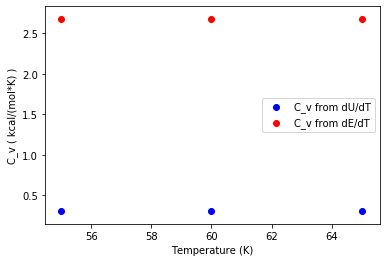

In [164]:
plt.scatter( (T_60K+T_50K)/2, (U_60K-U_50K)/(T_60K-T_50K) , c='b', label='C_v from dU/dT')
plt.scatter( (T_60K+T_50K)/2, (E_60K-E_50K)/(T_60K-T_50K) , c='r', label='C_v from dE/dT')

plt.scatter( (T_70K+T_50K)/2, (U_70K-U_50K)/(T_70K-T_50K) , c='b')
plt.scatter( (T_70K+T_50K)/2, (E_70K-E_50K)/(T_70K-T_50K) , c='r')

plt.scatter( (T_70K+T_60K)/2, (U_70K-U_60K)/(T_70K-T_60K) , c='b')
plt.scatter( (T_70K+T_60K)/2, (E_70K-E_60K)/(T_70K-T_60K) , c='r')

plt.legend()
plt.ylabel("C_v ( kcal/(mol*K) )")
plt.xlabel("Temperature (K)")

Text(0.5, 0, 'Temperature (K)')

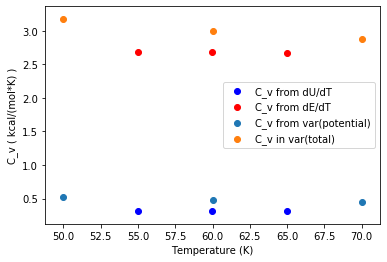

In [165]:
plt.scatter( (T_60K+T_50K)/2, (U_60K-U_50K)/(T_60K-T_50K) , c='b', label='C_v from dU/dT')
plt.scatter( (T_60K+T_50K)/2, (E_60K-E_50K)/(T_60K-T_50K) , c='r', label='C_v from dE/dT')

plt.scatter( (T_70K+T_50K)/2, (U_70K-U_50K)/(T_70K-T_50K) , c='b')
plt.scatter( (T_70K+T_50K)/2, (E_70K-E_50K)/(T_70K-T_50K) , c='r')

plt.scatter( (T_70K+T_60K)/2, (U_70K-U_60K)/(T_70K-T_60K) , c='b')
plt.scatter( (T_70K+T_60K)/2, (E_70K-E_60K)/(T_70K-T_60K) , c='r')

plt.scatter( temps, [C_v_u_50K, C_v_u_60K, C_v_u_70K] , label="C_v from var(potential)")
plt.scatter( temps, [C_v_e_50K, C_v_e_60K, C_v_e_70K] , label="C_v in var(total)")

plt.legend()
plt.ylabel("C_v ( kcal/(mol*K) )")
plt.xlabel("Temperature (K)")

Text(0.5, 0, 'Temperature (K)')

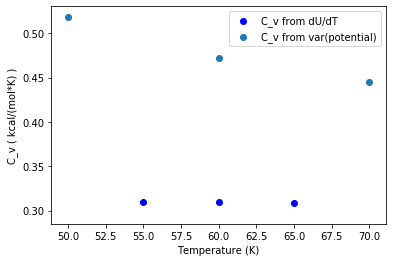

In [166]:
plt.scatter( (T_60K+T_50K)/2, (U_60K-U_50K)/(T_60K-T_50K) , c='b', label='C_v from dU/dT')

plt.scatter( (T_70K+T_50K)/2, (U_70K-U_50K)/(T_70K-T_50K) , c='b')

plt.scatter( (T_70K+T_60K)/2, (U_70K-U_60K)/(T_70K-T_60K) , c='b')

plt.scatter( temps, [C_v_u_50K, C_v_u_60K, C_v_u_70K] , label="C_v from var(potential)")

plt.legend()
plt.ylabel("C_v ( kcal/(mol*K) )")
plt.xlabel("Temperature (K)")

In [187]:
def get_data(file, warmup=1501):

    common_path = file # path of the lammps log file
    LJ_data = extract_properties_from_log(common_path)

    var_u = np.var(LJ_data['PotEng'][warmup:]) # Variance of potential energy kcal/mol
    var_e = np.var(LJ_data['TotEng'][warmup:]) # Variance of total energy kcal/mol

    k_b = 3.29983031e-27 # kcal/K
    T = np.mean(LJ_data['Temp'][warmup:]) # K
    N_A = 6.022e23 # mol

    C_v_u = var_u/(N_A*k_b*T*T) # kcal^2*K
                                # -----------
                                # kcal*mol^2*K^2 
    C_v_e = var_e/(N_A*k_b*T*T) # kcal^2*K
                                # -----------
                                # kcal*mol^2*K^2 
    
    E = np.mean(LJ_data['TotEng'][warmup:])
    U = np.mean(LJ_data['PotEng'][warmup:])
    T = np.mean(LJ_data['Temp'][warmup:])

    return var_u, var_e, C_v_u, C_v_e, E, U, T

In [168]:
common_path = 'graphene_single_layer_LJ_795C_after_temp_60K_log.txt' # path of the lammps log file
LJ_data = extract_properties_from_log(common_path)

warmup= 1501

var_u = np.var(LJ_data['PotEng'][warmup:]) # Variance of potential energy kcal/mol
var_e = np.var(LJ_data['TotEng'][warmup:]) # Variance of total energy kcal/mol

k_b = 3.29983031e-27 # kcal/K
T = np.mean(LJ_data['Temp'][warmup:]) # K
N_A = 6.022e23 # mol

C_v_u = var_u/(N_A*k_b*T*T) # kcal^2*K
                            # -----------
                            # kcal*mol^2*K^2
C_v_e = var_e/(N_A*k_b*T*T) # kcal^2*K
                            # -----------
                            # kcal*mol^2*K^2 

In [170]:
var_e/(N_A*k_b*T*T) # This is how we've been doing it

3.0000952937510803

In [171]:
var_e/(k_b*T*T) 

1.8066573858969005e+24

In [173]:
var_e*N_A/(k_b*T*T)

1.0879690777871135e+48

(700, 1000)

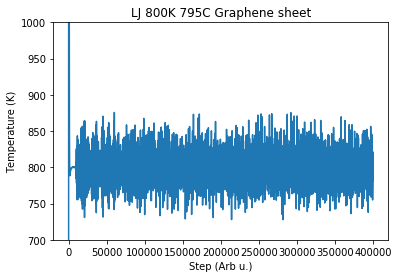

In [182]:
# Usage example
common_path = 'graphene_single_layer_LJ_795C_after_temp_800K_log.txt' # path of the lammps log file
LJ_data = extract_properties_from_log(common_path)
plt.plot( LJ_data['Step'] , LJ_data['Temp'] , label='Temperature')
plt.ylabel('Temperature (K)')
plt.xlabel('Step (Arb u.)')
plt.title('LJ 800K 795C Graphene sheet')
plt.ylim(700,1000)

(0, 3000)

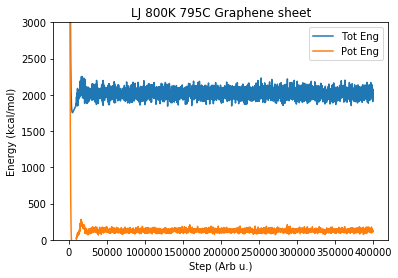

In [186]:
common_path = 'graphene_single_layer_LJ_795C_after_temp_800K_log.txt' # path of the lammps log file
LJ_data = extract_properties_from_log(common_path)
plt.plot( LJ_data['Step'] , LJ_data['TotEng'] , label='Tot Eng')
plt.plot( LJ_data['Step'] , LJ_data['PotEng'] , label='Pot Eng')
plt.ylabel('Energy (kcal/mol)')
plt.xlabel('Step (Arb u.)')
plt.title('LJ 800K 795C Graphene sheet')
plt.legend()
plt.ylim(0, 3000)

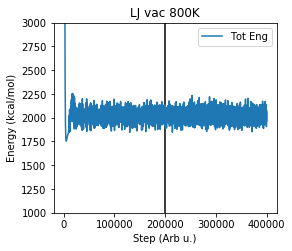

In [37]:
common_path = 'data/LJ/vacuum/graphene_single_layer_LJ_795C_after_temp_800K_log.txt' # path of the lammps log file
data = extract_properties_from_log(common_path)

fig, ax = plt.subplots(1,1,figsize=(4,3.5))

plt.plot( data['Step'] , data['TotEng'] , label='Tot Eng')
#plt.plot( LJ_data['Step'] , LJ_data['PotEng'] , label='Pot Eng')
plt.vlines(200000, ymin=1000, ymax=3000)
plt.ylabel('Energy (kcal/mol)')
plt.xlabel('Step (Arb u.)')
plt.title('LJ vac 800K')
plt.legend()
plt.ylim(1000, 3000)
plt.savefig(f'plots/LJvac-Convergence.png', dpi=150, bbox_inches='tight')

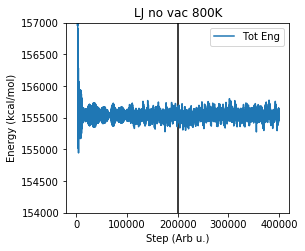

In [38]:
common_path = 'data/LJ/no_vacuum/graphene_single_layer_LJ_795C_after_temp_800K_log.txt' # path of the lammps log file
data = extract_properties_from_log(common_path)

fig, ax = plt.subplots(1,1,figsize=(4,3.5))

plt.plot( data['Step'] , data['TotEng'] , label='Tot Eng')
#plt.plot( LJ_data['Step'] , LJ_data['PotEng'] , label='Pot Eng')
plt.vlines(200000, ymin=154000, ymax=157000)
plt.ylabel('Energy (kcal/mol)')
plt.xlabel('Step (Arb u.)')
plt.title('LJ no vac 800K')
plt.legend()
plt.ylim(154000, 157000)
plt.savefig(f'plots/LJnovac-Convergence.png', dpi=150, bbox_inches='tight')

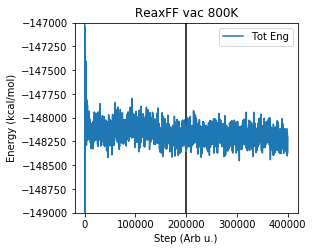

In [39]:
common_path = 'data/ReaxFF/vacuum/graphene_single_layer_ReaxFF_795_C_temp_800K_log.txt' # path of the lammps log file
data = extract_properties_from_log(common_path)

fig, ax = plt.subplots(1,1,figsize=(4,3.5))

plt.plot( data['Step'] , data['TotEng'] , label='Tot Eng')
#plt.plot( LJ_data['Step'] , LJ_data['PotEng'] , label='Pot Eng')
plt.vlines(200000, ymin=-149000, ymax=-147000)
plt.ylabel('Energy (kcal/mol)')
plt.xlabel('Step (Arb u.)')
plt.title('ReaxFF vac 800K')
plt.legend()
plt.ylim(-149000, -147000)
plt.savefig(f'plots/ReaxFFvac-Convergence.png', dpi=150, bbox_inches='tight')

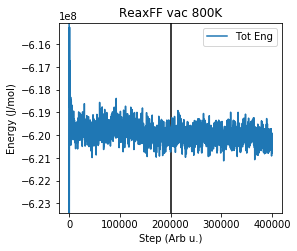

In [54]:
kcal_to_J = 4184

common_path = 'data/ReaxFF/vacuum/graphene_single_layer_ReaxFF_795_C_temp_800K_log.txt' # path of the lammps log file
data = extract_properties_from_log(common_path)

fig, ax = plt.subplots(1,1,figsize=(4,3.5))

plt.plot( data['Step'] , data['TotEng']*kcal_to_J , label='Tot Eng')
#plt.plot( LJ_data['Step'] , LJ_data['PotEng'] , label='Pot Eng')
plt.vlines(200000, ymin=-149000*kcal_to_J, ymax=-147000*kcal_to_J)
plt.ylabel('Energy (J/mol)')
plt.xlabel('Step (Arb u.)')
plt.title('ReaxFF vac 800K')
plt.legend()
plt.ylim(-149000*kcal_to_J, -147000*kcal_to_J)
plt.savefig(f'plots/ReaxFFvac-Convergence_Joules.png', dpi=150, bbox_inches='tight')

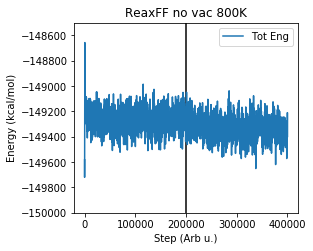

In [40]:
common_path = 'data/ReaxFF/no_vacuum/graphene_single_layer_ReaxFF_795_C_temp_800K_log.txt' # path of the lammps log file
data = extract_properties_from_log(common_path)

fig, ax = plt.subplots(1,1,figsize=(4,3.5))

plt.plot( data['Step'] , data['TotEng'] , label='Tot Eng')
#plt.plot( LJ_data['Step'] , LJ_data['PotEng'] , label='Pot Eng')
plt.vlines(200000, ymin=-150000, ymax=-148500)
plt.ylabel('Energy (kcal/mol)')
plt.xlabel('Step (Arb u.)')
plt.title('ReaxFF no vac 800K')
plt.legend()
plt.ylim(-150000, -148500)
plt.savefig(f'plots/ReaxFFnovac-Convergence.png', dpi=150, bbox_inches='tight')

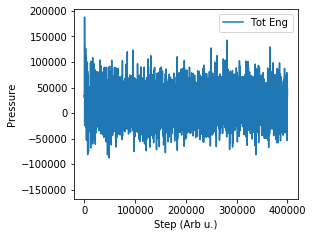

In [52]:
common_path = 'data/ReaxFF/no_vacuum/graphene_single_layer_ReaxFF_795_C_temp_1100K_log.txt' # path of the lammps log file
data = extract_properties_from_log(common_path)

fig, ax = plt.subplots(1,1,figsize=(4,3.5))

plt.plot( data['Step'] , data['Press'] , label='Tot Eng')
#plt.plot( LJ_data['Step'] , LJ_data['PotEng'] , label='Pot Eng')
plt.vlines(200000, ymin=-151000, ymax=-150000)
plt.ylabel('Pressure')
plt.xlabel('Step (Arb u.)')
#plt.title('ReaxFF vac 300K')
plt.legend()
#plt.ylim(-151500, -151000)

In [188]:
var_u_800K, var_e_800K, C_v_u_800K, C_v_e_800K, E_800K, U_800K, T_800K = get_data('graphene_single_layer_LJ_795C_after_temp_800K_log.txt')

In [189]:
var_u_900K, var_e_900K, C_v_u_900K, C_v_e_900K, E_900K, U_900K, T_900K = get_data('graphene_single_layer_LJ_795C_after_temp_900K_log.txt')

Text(0.5, 0, 'Temperature (K)')

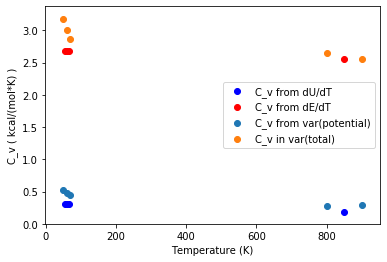

In [190]:
temps = [50,60,70, 800, 900]

plt.scatter( (T_60K+T_50K)/2, (U_60K-U_50K)/(T_60K-T_50K) , c='b', label='C_v from dU/dT')
plt.scatter( (T_60K+T_50K)/2, (E_60K-E_50K)/(T_60K-T_50K) , c='r', label='C_v from dE/dT')

plt.scatter( (T_70K+T_50K)/2, (U_70K-U_50K)/(T_70K-T_50K) , c='b')
plt.scatter( (T_70K+T_50K)/2, (E_70K-E_50K)/(T_70K-T_50K) , c='r')

plt.scatter( (T_70K+T_60K)/2, (U_70K-U_60K)/(T_70K-T_60K) , c='b')
plt.scatter( (T_70K+T_60K)/2, (E_70K-E_60K)/(T_70K-T_60K) , c='r')

plt.scatter( (T_900K+T_800K)/2, (U_900K-U_800K)/(T_900K-T_800K) , c='b')
plt.scatter( (T_900K+T_800K)/2, (E_900K-E_800K)/(T_900K-T_800K) , c='r')

plt.scatter( temps, [C_v_u_50K, C_v_u_60K, C_v_u_70K, C_v_u_800K, C_v_u_900K] , label="C_v from var(potential)")
plt.scatter( temps, [C_v_e_50K, C_v_e_60K, C_v_e_70K, C_v_e_800K, C_v_e_900K] , label="C_v in var(total)")

plt.legend()
plt.ylabel("C_v ( kcal/(mol*K) )")
plt.xlabel("Temperature (K)")

In [27]:
common_path = 'graphene_single_layer_ReaxFF_750_C_temp_800K_log.txt' # path of the lammps log file
ReaxFF_data = extract_properties_from_log(common_path)

Text(0.5, 1.0, 'ReaxtFF 800K 750C Graphene sheet')

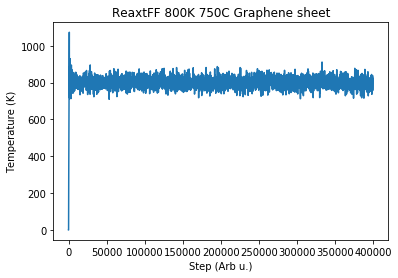

In [28]:
plt.plot( ReaxFF_data['Step'] , ReaxFF_data['Temp'] , label='Temperature')
plt.ylabel('Temperature (K)')
plt.xlabel('Step (Arb u.)')
plt.title('ReaxtFF 800K 750C Graphene sheet')

Text(0.5, 1.0, 'ReaxtFF 800K 750C Graphene sheet')

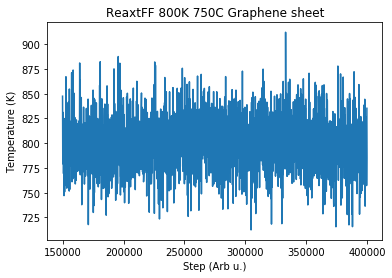

In [43]:
plt.plot( ReaxFF_data['Step'][1500:] , ReaxFF_data['Temp'][1500:] , label='Temperature')
plt.ylabel('Temperature (K)')
plt.xlabel('Step (Arb u.)')
plt.title('ReaxtFF 800K 750C Graphene sheet')

In [42]:
np.std(ReaxFF_data['Temp'][1500:])

26.869175921695078

Text(0.5, 1.0, 'ReaxFF 800K 750C Graphene sheet')

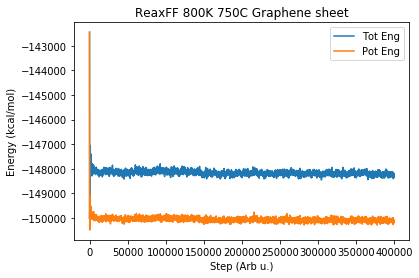

In [44]:
plt.plot( ReaxFF_data['Step'] , ReaxFF_data['TotEng'] , label='Tot Eng')
plt.plot( ReaxFF_data['Step'] , ReaxFF_data['PotEng'] , label='Pot Eng')
plt.ylabel('Energy (kcal/mol)')
plt.xlabel('Step (Arb u.)')
plt.legend()
plt.title('ReaxFF 800K 750C Graphene sheet')
#plt.ylim(-6950, -6700)

In [45]:
var_e = np.var(ReaxFF_data['PotEng'][1500:]) # Variance of total energy kcal/mol
k_b = 3.29983031e-27 # kcal/K
N_A = 6.022e23 # mol
T = np.mean(ReaxFF_data['Temp'][1500:]) # Temperature mean
C_v = var_e/(N_A*k_b*T*T) # kcal^2*K
                      # -----------
                      # kcal*mol^2*K^2 

# kcal to Joules
kcal_to_J = 4184 

In [46]:
C_v*kcal_to_J

15209.092120199359